In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine.csv', header=None, usecols=[0,1,2])
df.columns=['Class Label', 'Alcohol', 'Malic acid']
df.head()

,Class Label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Malic acid'>

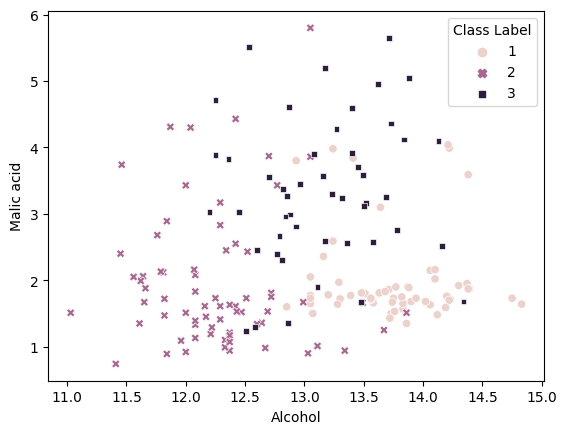

In [5]:
sns.scatterplot(data='wine.csv',x=df['Alcohol'],y=df['Malic acid'],hue=df['Class Label'],style=df['Class Label'])

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Class Label', axis=1), df['Class Label'], test_size=0.3, random_state=0)

In [7]:
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaler1.fit(x_train)
x_train_scaled = scaler1.transform(x_train)
x_test_scaled = scaler1.transform(x_test)

In [12]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [13]:
np.round(x_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [14]:
np.round(x_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


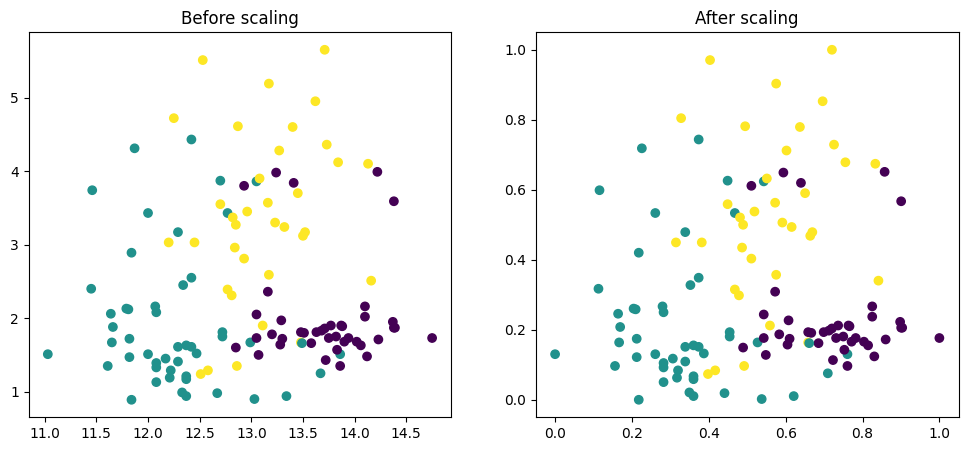

In [16]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Alcohol'], x_train['Malic acid'], c=y_train)
ax1.set_title('Before scaling')

ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic acid'], c=y_train)
ax2.set_title('After scaling')

plt.show()

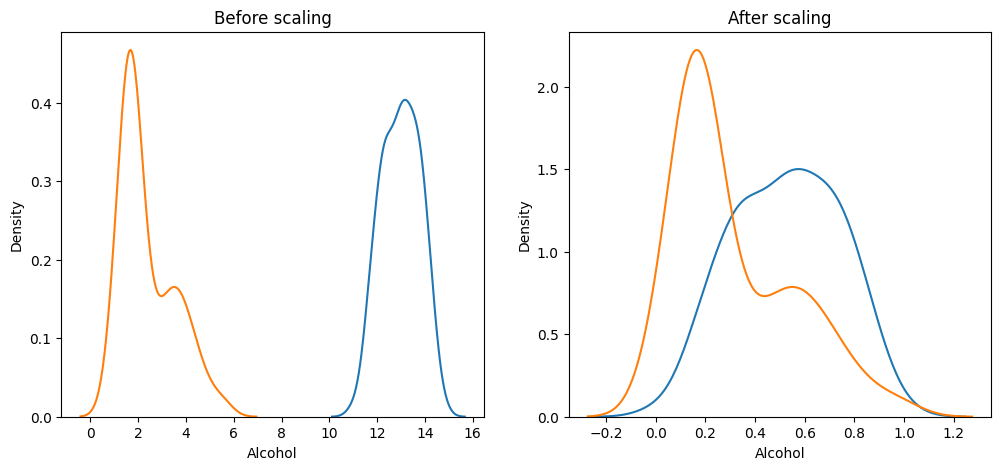

In [21]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic acid'], ax=ax1)
ax1.set_title('Before scaling')

sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)
ax2.set_title('After scaling')

plt.show()

Note: The graph of distribution may or may not change

MaxAbsScaling is also something which is used in cases where there is sparse data present. We have a class for this in scikit learn. Its formula is x_i' = (x_i) / (|x_max| )

Robust Scaler is also used somewhere. Just experiment and see. Used when have outliers are present.